<br> </br>
<font size = 8> <center> Machine learning 1 </center> </font>
<font size = 6> <center>  <b> 2. Data preparation </b> </center>
<br>
<font size = 5> <center> Piotr Wójcik </center> </font>
<font size = 5> <center> University of Warsaw
<font size = 5> <center> pwojcik@wne.uw.edu.pl
<br> </br>
<font size = 5> <center>  academic year 2024/2025 </center> </font>
</center> </font>

# Data description

The data from the file `"data/houses.csv"`.

The file contains data on the characteristics and prices of houses sold in the city of Ames (Iowa, USA) between 2006 and 2010.

It includes 2930 observations and 81 variables.

The dataset was used some time ago in the kaggle competition: [https://www.kaggle.com/c/house-prices-advanced-regression-techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

The task was to use data from before 2010 to build a model predicting real estate prices sold in 2010.

The data have been initially pre-ordered (variable names with underscores, clearly defined individual levels of qualitative variables).

The description of variables (types and definition) can be found for example here (names might be slightly different): [https://rdrr.io/cran/subgroup.discovery/man/ames.html](https://rdrr.io/cran/subgroup.discovery/man/ames.html)

The detailed description of the variable levels can be found here: [http://jse.amstat.org/v19n3/decock/DataDocumentation.txt](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) and in the text file `"data/DataDocumentation.txt"` in lab materials.

Identification variables

* `Order`: Observation number
* `PID`: Parcel/property identification number


In [1]:
# change working directory
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/ML1_2024_2025/02'

Mounted at /content/drive
/content/drive/My Drive/ML1_2024_2025/02


In [2]:
# import all the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import seaborn as sns
import pickle

In [3]:
# lets import data
houses = pd.read_csv("data/houses.csv")

houses.head() # Shows the first five rows of the dataset

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,1,526301100,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,2,526350040,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,3,526351010,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,4,526353030,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,5,527105010,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [4]:
# the structure of the dataset
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order               2930 non-null   int64  
 1   PID                 2930 non-null   int64  
 2   MS_SubClass         2930 non-null   object 
 3   MS_Zoning           2930 non-null   object 
 4   Lot_Frontage        2930 non-null   int64  
 5   Lot_Area            2930 non-null   int64  
 6   Street              2930 non-null   object 
 7   Alley               2930 non-null   object 
 8   Lot_Shape           2930 non-null   object 
 9   Land_Contour        2930 non-null   object 
 10  Utilities           2930 non-null   object 
 11  Lot_Config          2930 non-null   object 
 12  Land_Slope          2930 non-null   object 
 13  Neighborhood        2930 non-null   object 
 14  Condition_1         2930 non-null   object 
 15  Condition_2         2930 non-null   object 
 16  Bldg_T

# Missing values

Lets check the existence of missing values and apply simple imputation for categorical and/or numerical variables.

In [5]:
columns_with_missings = houses.columns[houses.isnull().any()]

houses[columns_with_missings].isnull().sum()

,0
Mas_Vnr_Type,1775
Electrical,1
Misc_Feature,2824


In [6]:
# frequency tables for these columns

print("Frequency counts for Mas_Vnr_Type: \n")
print(houses['Mas_Vnr_Type'].value_counts(dropna = False))

print("\nFrequency counts for Electrical: \n")
print(houses['Electrical'].value_counts(dropna = False))

print("\nFrequency counts for Misc_Feature: \n")
print(houses['Misc_Feature'].value_counts(dropna = False))


Frequency counts for Mas_Vnr_Type: 

Mas_Vnr_Type
NaN        1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64

Frequency counts for Electrical: 

Electrical
SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
NaN         1
Mix         1
Name: count, dtype: int64

Frequency counts for Misc_Feature: 

Misc_Feature
NaN     2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: count, dtype: int64


In [7]:
# according to data description the missing value in Mas_Vnr_Type and in Misc_Feature should be the value "None"
# in case of Electrical column we can replace the missing value with the most frequent level "SBrkr"

# All these can be done BEFORE the train/test aplit as they do not depend on the specific data distribution

houses['Mas_Vnr_Type'] = houses['Mas_Vnr_Type'].fillna('None')
houses['Misc_Feature'] = houses['Misc_Feature'].fillna('None')

houses['Electrical'] = houses['Electrical'].fillna('SBrkr')

In [8]:
# frequency tables again to check the results of imputation

print("Frequency counts for Mas_Vnr_Type: \n")
print(houses['Mas_Vnr_Type'].value_counts(dropna = False))

print("\nFrequency counts for Electrical: \n")
print(houses['Electrical'].value_counts(dropna = False))

print("\nFrequency counts for Misc_Feature: \n")
print(houses['Misc_Feature'].value_counts(dropna = False))

Frequency counts for Mas_Vnr_Type: 

Mas_Vnr_Type
None       1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64

Frequency counts for Electrical: 

Electrical
SBrkr    2683
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

Frequency counts for Misc_Feature: 

Misc_Feature
None    2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: count, dtype: int64


In [9]:
# check for missing values after imputation

columns_with_missings = houses.columns[houses.isnull().any()]

houses[columns_with_missings].isnull().sum()

# no more missings

,0


# Distributions of nominal variables

Lets check the frequencies of individual levels of all the nominal variables.

Extremely small counts of single levels are problematic as they might be very rare cases which a model will not be able to learn how they influence the sale price.

Therefore we will eplace all the levels which have no more than 25 observations with the label "other".



In [10]:
# Lets check the frequencies of individual levels of all the nominal variables
nominal_variables = ['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Lot_Config',
                     'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
                     'House_Style', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
                     'Exterior_2nd', 'Mas_Vnr_Type', 'Foundation', 'Misc_Feature',
                     'Heating', 'Central_Air', 'Garage_Type', 'Misc_Feature',
                     'Sale_Type', 'Sale_Condition', 'Land_Contour']

# Loop through each nominal variable
for var in nominal_variables:
    # Get the value counts for each category in the variable
    value_counts = houses[var].value_counts()
    print("\n")
    print(houses[var].value_counts(dropna = False))



MS_SubClass
One_Story_1946_and_Newer_All_Styles          1079
Two_Story_1946_and_Newer                      575
One_and_Half_Story_Finished_All_Ages          287
One_Story_PUD_1946_and_Newer                  192
One_Story_1945_and_Older                      139
Two_Story_PUD_1946_and_Newer                  129
Two_Story_1945_and_Older                      128
Split_or_Multilevel                           118
Duplex_All_Styles_and_Ages                    109
Two_Family_conversion_All_Styles_and_Ages      61
Split_Foyer                                    48
Two_and_Half_Story_All_Ages                    23
One_and_Half_Story_Unfinished_All_Ages         18
PUD_Multilevel_Split_Level_Foyer               17
One_Story_with_Finished_Attic_All_Ages          6
One_and_Half_Story_PUD_All_Ages                 1
Name: count, dtype: int64


MS_Zoning
Residential_Low_Density         2273
Residential_Medium_Density       462
Floating_Village_Residential     139
Residential_High_Density          27


In [ ]:
# Lets replace all the levels which have no more than 25 observations (ca. 1% of the sample size) with the label "other"

# IMPORTANT! Remember that for a nominal variable we can combine any levels together,
# while for an ORDINAL feature ONLY neighboring levels can be combined!

# Based on the information about the dataset we can list all nominal variables

# Loop through each nominal variable
for var in nominal_variables:
    # Get the value counts for each category in the variable
    value_counts = houses[var].value_counts()
    # Identify the levels with counts not higher than 25
    levels_to_replace = value_counts[value_counts <= 25].index
    # Replace these levels with "Other"
    houses[var] = houses[var].replace(levels_to_replace, "Other")

In [ ]:
# Lets check the frequencies of nominal variables again
for var in nominal_variables:
    # Get the value counts for each category in the variable
    value_counts = houses[var].value_counts()
    print("\n")
    print(houses[var].value_counts(dropna = False))

# Looks like the problem with small counts has been solved



MS_SubClass
One_Story_1946_and_Newer_All_Styles          1079
Two_Story_1946_and_Newer                      575
One_and_Half_Story_Finished_All_Ages          287
One_Story_PUD_1946_and_Newer                  192
One_Story_1945_and_Older                      139
Two_Story_PUD_1946_and_Newer                  129
Two_Story_1945_and_Older                      128
Split_or_Multilevel                           118
Duplex_All_Styles_and_Ages                    109
Other                                          65
Two_Family_conversion_All_Styles_and_Ages      61
Split_Foyer                                    48
Name: count, dtype: int64


MS_Zoning
Residential_Low_Density         2273
Residential_Medium_Density       462
Floating_Village_Residential     139
Other                             29
Residential_High_Density          27
Name: count, dtype: int64


Street
Pave     2918
Other      12
Name: count, dtype: int64


Alley
No_Alley_Access    2732
Gravel              120
Paved             

# Near-zero variance

What can be still problematic however is the **strong concentration of variable values in one level** (issue called: **near-zero variance**) - such variables have little predictive power and can be omitted

To identify variables that have a small variance one can use a measure based on the ratio of the most frequent and second most frequent values (**frequency ratio**)/

For well diversified variables it will take a value close to 1, and a very high value for unbalanced data.

Another useful measure is the **percent of unique values**: `100 * (number of unique values) / (number of observations)`

It is close to zero for data that is not very diversified.

If the "frequency ratio" is greater than some threshold, and the "percent of unique values" is less than a certain limit value, we can assume that the variable has a variance close to 0 and can be potentially omitted.

Lets define a function which will check it with the threshold 95/5 for the **frequency ratio** and 10 for the **percent of unique values**.


In [ ]:
# lets define a function checking near-zero variance
def near_zero_var(df, freq_cut=95/5, unique_cut=10):
    """
    Identifies columns with near-zero variance in a DataFrame and calculates indicators.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - freq_cut (float): Threshold for the frequency ratio (default = 95/5).
    - unique_cut (int): Threshold for the unique value ratio (default = 10).

    Returns:
    - pd.DataFrame: A sorted DataFrame containing:
        - variable: Column name
        - freq_ratio: Ratio of the most common value to the second most common value
        - unique_ratio: Ratio of unique values to total observations
        - high_freq_ratio: Binary indicator (1 if freq_ratio > freq_cut)
        - low_unique_ratio: Binary indicator (1 if unique_ratio < unique_cut)
    """
    results = []

    for col in df.columns:
        # Get the value counts
        counts = df[col].value_counts()

        # Calculate freq_ratio
        if len(counts) > 1:
            freq_ratio = counts.iloc[0] / counts.iloc[1]
        else:
            freq_ratio = float('inf')  # Only one unique value

        # Calculate unique_ratio
        unique_ratio = len(counts) / len(df)

        # Determine binary indicators
        high_freq_ratio = int(freq_ratio > freq_cut)
        low_unique_ratio = int(unique_ratio < unique_cut)

        # Append results
        results.append({
            'variable': col,
            'freq_ratio': freq_ratio,
            'unique_ratio': unique_ratio,
            'high_freq_ratio': high_freq_ratio,
            'low_unique_ratio': low_unique_ratio
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Sort by 'high_freq_ratio' (descending) and 'low_unique_ratio' (ascending)
    results_df = results_df.sort_values(by=['freq_ratio', 'unique_ratio'], ascending=[False, True])

    return results_df


In [ ]:
# and apply it to our dataset

houses_nzv = near_zero_var(houses, freq_cut=97/3, unique_cut=10)

houses_nzv[(houses_nzv['low_unique_ratio'] == 1) & (houses_nzv['high_freq_ratio'] == 1)]

,variable,freq_ratio,unique_ratio,high_freq_ratio,low_unique_ratio
71,Pool_Area,2917.000000,0.004778,1,1
10,Utilities,1463.500000,0.001024,1,1
69,Three_season_porch,964.333333,0.010580,1,1
72,Pool_QC,729.250000,0.001706,1,1
46,Low_Qual_Fin_SF,722.500000,0.012287,1,1
37,BsmtFin_SF_2,515.800000,0.093515,1,1
6,Street,243.166667,0.000683,1,1
70,Screen_Porch,205.692308,0.041297,1,1
75,Misc_Val,157.055556,0.012969,1,1
27,Mas_Vnr_Area,118.066667,0.151877,1,1


In [ ]:
# lets remove problematic variables from the dataset

variables_nzv = houses_nzv[(houses_nzv['low_unique_ratio'] == 1) & (houses_nzv['high_freq_ratio'] == 1)]['variable']

print(variables_nzv)

houses.drop(variables_nzv, axis = 1, inplace = True)

In [ ]:
print(variables_nzv)

71             Pool_Area
10             Utilities
69    Three_season_porch
72               Pool_QC
46       Low_Qual_Fin_SF
37          BsmtFin_SF_2
6                 Street
70          Screen_Porch
75              Misc_Val
27          Mas_Vnr_Area
68        Enclosed_Porch
40               Heating
15           Condition_2
45         Second_Flr_SF
23             Roof_Matl
56            Functional
Name: variable, dtype: object


In [ ]:
# Lets also drop Lattitude and Longitude
houses.drop(['Latitude', 'Longitude'], axis = 1, inplace = True)

# Train/test split

In [ ]:
# Lets split the data into train and test samples based on a year

houses_train = houses[houses["Year_Sold"] <= 2008]
houses_test = houses[houses["Year_Sold"] > 2008]

# check frequencies by year

print(houses_train["Year_Sold"].value_counts())

print(houses_test["Year_Sold"].value_counts())

Year_Sold
2007    694
2006    625
2008    622
Name: count, dtype: int64
Year_Sold
2009    648
2010    341
Name: count, dtype: int64


# Distribution of the dependent variable

Lets check the distribution (histogram) of the dependent variable `Sale_Price`.

Compare how it looks after log transformation. Lets take log(x + 1) in case of zeroes

<Axes: xlabel='Sale_Price', ylabel='Count'>

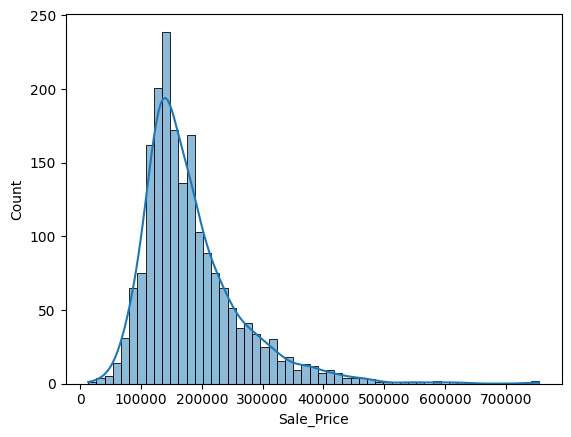

In [ ]:
# Original distribution
sns.histplot(houses_train["Sale_Price"], kde = True)

# clearly right-skewed

<Axes: xlabel='Sale_Price', ylabel='Count'>

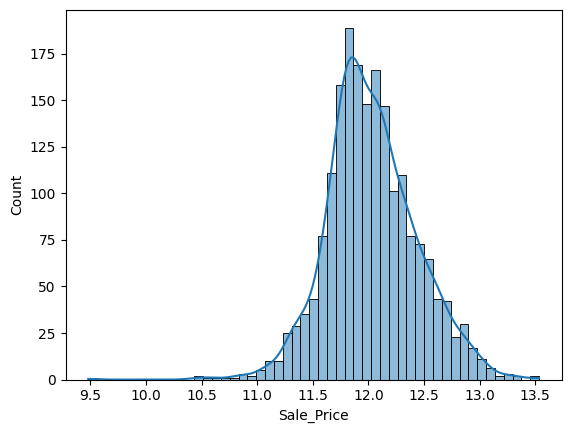

In [ ]:
# Create a new object for the log-transformed Sale_Price (we do not add a new column in the dataframe)
Sale_Price_Log = np.log(houses_train["Sale_Price"] + 1)
# and plot its histogram
sns.histplot(Sale_Price_Log, kde = True)

# much more "normal-like" - probably better for modelling

# Levels of numerical variables

Lets check how many unique values does each numeric variable have (qualitative variables can also be stored as numeric - e.g. as 0/1).

We will print frequency tables for those that have only 3-5 levels.

How it may influence the data preparation for modelling?


In [ ]:
numeric_variables = houses_train.select_dtypes(include=[np.number]).columns

for col in numeric_variables:
    unique_vals = houses_train[col].unique()
    n_unique = len(unique_vals)
    print(f"Column '{col}' has {n_unique} unique values.")

    # If a variable has no more than 5 unique values, print a frequency table
    if n_unique <= 5:
        print(f"Frequency table for '{col}':")
        print(houses_train[col].value_counts(dropna = False), "\n")

Column 'Order' has 1941 unique values.
Column 'PID' has 1941 unique values.
Column 'Lot_Frontage' has 119 unique values.
Column 'Lot_Area' has 1413 unique values.
Column 'Year_Built' has 110 unique values.
Column 'Year_Remod_Add' has 60 unique values.
Column 'BsmtFin_SF_1' has 8 unique values.
Column 'Bsmt_Unf_SF' has 938 unique values.
Column 'Total_Bsmt_SF' has 870 unique values.
Column 'First_Flr_SF' has 901 unique values.
Column 'Gr_Liv_Area' has 1045 unique values.
Column 'Bsmt_Full_Bath' has 3 unique values.
Frequency table for 'Bsmt_Full_Bath':
Bsmt_Full_Bath
0    1158
1     761
2      22
Name: count, dtype: int64 

Column 'Bsmt_Half_Bath' has 3 unique values.
Frequency table for 'Bsmt_Half_Bath':
Bsmt_Half_Bath
0    1819
1     118
2       4
Name: count, dtype: int64 

Column 'Full_Bath' has 4 unique values.
Frequency table for 'Full_Bath':
Full_Bath
2    1005
1     878
3      51
0       7
Name: count, dtype: int64 

Column 'Half_Bath' has 3 unique values.
Frequency table for 'H

`Bsmt_Full_Bath`, `Bsmt_Half_Bath`, `Full_Bath`, `Half_Bath`, `Kitchen_AbvGr`, `Fireplaces`, `Garage_Cars` are in fact counts with just few levels.

Lets keep them as numeric variables not to increase the number of data dimensions. Alternatively we may consider **combining some levels** (e.g. into 0, 1 vs rest) and apply one-hot encoding.


`Year_Sold` cannot be one-hot-encoded as its values are different in train and test samples - we keep it also as a numeric variable

# Levels of ordinal variables

Lets check how many unique values does each ORDINAL variable have.

We will print frequency tables for them and think how it may influence the data preparation for modelling


In [ ]:
# List of ordinal variables based on the dataset description
# (remember that Utilities, Pool_QC and Functional columns were already removed)

ordinal_variables = [
    'Lot_Shape', 'Land_Slope', 'Exter_Qual', 'Exter_Cond', 'Bsmt_Qual', 'Bsmt_Cond',
    'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating_QC', 'Kitchen_Qual',
    'Fireplace_Qu', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond', 'Paved_Drive',
    'Fence', 'Overall_Qual', 'Overall_Cond'
]

for col in ordinal_variables:
    unique_vals = houses_train[col].unique()
    n_unique = len(unique_vals)
    print(f"Column '{col}' has {n_unique} unique values.")
    print(f"Frequency table for '{col}':")
    print(houses_train[col].value_counts(dropna = False), "\n")

Column 'Lot_Shape' has 4 unique values.
Frequency table for 'Lot_Shape':
Lot_Shape
Regular                 1213
Slightly_Irregular       661
Moderately_Irregular      55
Irregular                 12
Name: count, dtype: int64 

Column 'Land_Slope' has 3 unique values.
Frequency table for 'Land_Slope':
Land_Slope
Gtl    1850
Mod      81
Sev      10
Name: count, dtype: int64 

Column 'Exter_Qual' has 4 unique values.
Frequency table for 'Exter_Qual':
Exter_Qual
Typical      1201
Good          658
Excellent      65
Fair           17
Name: count, dtype: int64 

Column 'Exter_Cond' has 5 unique values.
Frequency table for 'Exter_Cond':
Exter_Cond
Typical      1704
Good          187
Fair           41
Excellent       8
Poor            1
Name: count, dtype: int64 

Column 'Bsmt_Qual' has 6 unique values.
Frequency table for 'Bsmt_Qual':
Bsmt_Qual
Typical        847
Good           817
Excellent      168
Fair            57
No_Basement     50
Poor             2
Name: count, dtype: int64 

Column '

# Encoding of categorical predictors

Most of machine learning algorithms like Linear Regression, Neural Networks, SVMs, KNN, etc., aren’t designed to process text-based categorical data directly. So, it’s crucial to transform categorical data into a numerical form, a process known as data encoding.

Notably, some tree-based ML algorithms like Decision Trees and Random Forests can handle categorical data natively, circumventing the need for encoding. However, for most other algorithms, encoding is a vital preprocessing step.

Lets apply level encoding on all ordinal predictors and one-hot encoding on all nominal predictors

## Encoding **ordinal** variables

Ordinal encoding is appropriate when the categories have a natural ordering or relationship with each other, such as in the case of ordinal variables like "small," "medium," and "large." In these cases, the integer values assigned to the categories should reflect the ordering of the categories.

In [ ]:
# Lets create a list of variables to include in the ordinal encoder

ordinal_variables_to_transform = ['Lot_Shape', 'Land_Slope', 'Overall_Qual', 'Overall_Cond',
                                  'Exter_Qual', 'Exter_Cond', 'Heating_QC', 'Kitchen_Qual',
                                  'Bsmt_Qual', 'Bsmt_Cond', 'Fireplace_Qu', 'Garage_Qual',
                                  'Garage_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2',
                                  'Electrical', 'Garage_Finish', 'Paved_Drive', 'Fence']

# For each of them we need to define a CORRECT order (based on the data description file)

Lot_Shape_order = ['Regular', 'Slightly_Irregular', 'Moderately_Irregular','Irregular']
Land_Slope_order = ['Gtl', 'Mod', 'Sev']
# for two variables: Overall_Qual and Overall_Comd
Overall_Qual_Cond_order =  ['Very_Excellent', 'Excellent', 'Very_Good', 'Good', 'Above_Average', 'Average',
                            'Below_Average', 'Fair','Poor', 'Very_Poor']
# for Exter_Qual, Exter_Cond, Heating_QC, Kitchen_Qual
Qual_Cond_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor']
Bsmt_Qual_Cond_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor', 'No_Basement']
Fireplace_Qu_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor', 'No_Fireplace']
Garage_Qual_Cond_order = ['Excellent', 'Good', 'Typical', 'Fair', 'Poor', 'No_Garage']
Bsmt_Exposure_order = ['Gd', 'Av', 'Mn', 'No', 'No_Basement']
BsmtFin_Type_1_2_order = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'No_Basement']
Electrical_order = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']
Garage_Finish_order = ['Fin', 'RFn', 'Unf', 'No_Garage']
Paved_Drive_order = ['Paved', 'Partial_Pavement', 'Dirt_Gravel' ]
Fence_order = ['Good_Privacy', 'Minimum_Privacy', 'Good_Wood', 'Minimum_Wood_Wire', 'No_Fence']


In [ ]:
# then we initialize OrdinalEncoder providing a list of categories for each of the variables which will be transformed

# if the argument categories= is an array, it has to be of shape (n_features,)

# we put the list in the same order as in 'ordinal_variables_to_transform'

encoder_ord = OrdinalEncoder(categories = [Lot_Shape_order,         # Lot_Shape
                                           Land_Slope_order,        # Land_Slope
                                           Overall_Qual_Cond_order, # Overall_Qual
                                           Overall_Qual_Cond_order, # Overall_Cond
                                           Qual_Cond_order,         # Exter_Qual
                                           Qual_Cond_order,         # Exter_Cond
                                           Qual_Cond_order,         # Heating_QC
                                           Qual_Cond_order,         # Kitchen_Qual
                                           Bsmt_Qual_Cond_order,    # Bsmt_Qual
                                           Bsmt_Qual_Cond_order,    # Bsmt_Cond
                                           Fireplace_Qu_order,      # Fireplace_Qu
                                           Garage_Qual_Cond_order,  # Garage_Qual
                                           Garage_Qual_Cond_order,  # Garage_Cond
                                           Bsmt_Exposure_order,     # Bsmt_Exposure
                                           BsmtFin_Type_1_2_order,  # BsmtFin_Type_1
                                           BsmtFin_Type_1_2_order,  # BsmtFin_Type_2
                                           Electrical_order,        # Electrical
                                           Garage_Finish_order,     # Garage_Finish
                                           Paved_Drive_order,       # Paved_Drive
                                           Fence_order],            # Fence
                              handle_unknown = 'use_encoded_value', # just in case any new value appears
                              unknown_value = -1)  # Encodes unknown categories as -1

In [ ]:
# Apply to training data (variables in the same order as the lists of categories above)

# fit_transform() method applied on training data and transform() method on test data

# !!!!!! Using the transform method we apply the same rules defined on the training data to transform the test data.

# check for more detailed explanation of the difference between .fit_transform() and .transform()
# e.g. here https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

# houses_train.loc[:, columns] explicitly references the DataFrame slice where the assignment will occur,
# making it clear to pandas that you're modifying the original DataFrame.
# The : indicates all rows, while the list of columns specifies the exact columns to update.

houses_train.loc[:, ordinal_variables_to_transform] = encoder_ord.fit_transform(houses_train[ordinal_variables_to_transform])

# Apply transform for the test data using the same fitted encoder
houses_test.loc[:, ordinal_variables_to_transform] = encoder_ord.transform(houses_test[ordinal_variables_to_transform])

# Check the result
houses_test.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Alley,Lot_Shape,Land_Contour,Lot_Config,...,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Fence,Misc_Feature,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,526301100,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,No_Alley_Access,1.0,Lvl,Corner,...,1.0,210,62,4.0,None,5,2010,WD,Normal,215000
1,2,526350040,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,No_Alley_Access,0.0,Lvl,Inside,...,0.0,140,0,1.0,None,6,2010,WD,Normal,105000
2,3,526351010,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,No_Alley_Access,1.0,Lvl,Corner,...,0.0,393,36,4.0,Other,6,2010,WD,Normal,172000
3,4,526353030,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,No_Alley_Access,0.0,Lvl,Corner,...,0.0,0,0,4.0,None,4,2010,WD,Normal,244000
4,5,527105010,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,No_Alley_Access,1.0,Lvl,Inside,...,0.0,212,34,1.0,None,3,2010,WD,Normal,189900


## Encoding **nominal** variables

One-hot encoding is appropriate when the categories do not have an intrinsic ordering or relationship with each other. This is because one-hot encoding treats each category as a separate entity with no relation to the other categories. One-hot encoding is also useful when the number of categories is relatively small, as the number of columns can become unwieldy for very large numbers of categories.

`pandas.get_dummies` is straightforward to use and it automatically converts only the listed column(s), keeping all the others untouched, but copying them into a resulting dataset.

Another approach is to use `OneHotEncoder` from the sklearn library, which is useful in machine learning tasks.

The primary difference is `pandas.get_dummies` cannot learn encodings - store the rules to apply it on another dataset; it can only perform one-hot-encoding on the dataset you pass as an input.

`sklearn.OneHotEncoder` is a class that can be saved and used to transform other incoming datasets in the future.

However, it requires more data transformations if applied out of the model pipeline.

For more details check e.g. here https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial

In [ ]:
# now we transform the nominal variables

# lets exlude from the list those which had nzv
# !! variables_nzv is pandas.core.series.Series - we need a list below
nominal_variables_left = [var for var in nominal_variables if var not in variables_nzv.tolist()]

In [ ]:
# and one-hot-encoding using the pandas get_dummies()
# train
houses_train = pd.get_dummies(houses_train,
                              columns = nominal_variables_left,
                              drop_first = True,
                              dtype = int) # bool by default

# test
houses_test = pd.get_dummies(houses_test,
                             columns = nominal_variables_left,
                             drop_first = True,
                             dtype = int)

houses_test.head()

,Order,PID,Lot_Frontage,Lot_Area,Lot_Shape,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,...,Sale_Type_New,Sale_Type_Other,Sale_Type_WD,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Other,Sale_Condition_Partial,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl
0,1,526301100,141,31770,1.0,0.0,4.0,5.0,1960,1960,...,0,0,1,0,1,0,0,0,0,1
1,2,526350040,80,11622,0.0,0.0,5.0,4.0,1961,1961,...,0,0,1,0,1,0,0,0,0,1
2,3,526351010,81,14267,1.0,0.0,4.0,4.0,1958,1958,...,0,0,1,0,1,0,0,0,0,1
3,4,526353030,93,11160,0.0,0.0,3.0,5.0,1968,1968,...,0,0,1,0,1,0,0,0,0,1
4,5,527105010,74,13830,1.0,0.0,5.0,5.0,1997,1998,...,0,0,1,0,1,0,0,0,0,1


# Save the final data as a pickle

Lets save the final `houses_train` and `houses_test` datasets as pickles (`*.pkl`) into the `"data"` folder for further analyses.


In [ ]:
# 'wb' stands for write in a binary mode

with open("data/houses_prepared.pkl", "wb") as f:
    pickle.dump(houses_train, f)
    pickle.dump(houses_test, f)

# Exercises 2

## Description of `churn` dataset

Examples for classification will be based on the `churn` dataset.

The dataset includes 10127 observations and the following columns:
  
* `customer_id` - unique observation identifier
* `customer_age` - age of the customer in years
* `customer_gender` - gender of the customer
* `customer_number_of_dependents` - number of dependents on the customer
* `customer_education` - education level of the customer
* `customer_civil_status` - civil status of the customer
* `customer_salary_range` - range of the annual salary of the customer
* `customer_relationship_length` - length of customer’s relationship with bank in months
* `customer_available_credit_limit` - available limit on the customer’s credit card account
* `credit_card_classification` - classification of the card (Blue, Silver, Gold, Platinum)
* `total_products` - total number of products held by the customer in the bank
* `period_inactive` - period in the last year when customer was inactive (in months)
* `contacts_in_last_year` - number of contacts with the customer in the last year
* `credit_card_debt_balance` - total card debt balance on the credit card account
* `remaining_credit_limit` - remaining limit on the customer’s credit card account (average in last year)
* `transaction_amount_ratio` - ratio in total amount of transactions in the 4th quarter against the 1st quarter
* `total_transaction_amount` - total amount of transactions in the last year
* `total_transaction_count` - total number of transactions in the last year
* `transaction_count_ratio` - ratio in total count of transactions in the 4th quarter against the 1st quarter
* `average_utilization` - average card utilization (percentage used of total limit)
* `account_status` - customer account status: closed, open (outcome variable, only in the training sample)

## Exercise 2.1

Import the data from the file 'data/churn.csv' and check its structure.

In [ ]:
# place for solution to exercise 2.1

## Exercise 2.2

* check if there are any missing values
* show frequency tables for **categorical** columns with missing values
* if any, replace missing values in **categorical** columns with the string `unknown`.

In [ ]:
# Then we apply the train/test split - BEFORE imputation which takes into account the distribution of variables

# random split into train (70%)/test (30%) stratified by 'account_status'
churn_train, churn_test = train_test_split(
    churn,
    test_size = 0.3,
    stratify = churn['account_status'],
    random_state = 123456 # keep constant for reproducibility
)

In [ ]:
# place for solution to exercise 2.2

## Exercise 2.3

If any missings in **numerical** columns, apply the imputation with the mean, e.g. using `SimpleImputer(strategy = 'mean')` -- remember about creating the rule just on the training data


In [ ]:
# place for solution to exercise 2.3

## Exercise 2.4

Apply ordinal encoding to all **ordinal** predictors -- remember about the correct order.

In case of the existence of the `Unknown` level -- put it as the lowest value.

In [ ]:
# place for solution to exercise 2.4

## Exercise 2.5

Apply one-hot-encoding to all nominal predictors.

Make sure that for the dependent variable the resulting dummy refers to the level `acount_status = 'closed'`.

In [ ]:
# place for solution to exercise 2.5

## Exercise 2.6

Save the final train and test datasets for further steps into pickle file.

In [ ]:
# place for solution to exercise 2.6